# Chapter 5 - Using Quantum Annealer - Developing a QUBO function and using Constraints  
### Team Selection Example
© 2021, 2022 Packt Publishing

Written by Alex Khan


In [1]:
# Copy in Matrix from File
import pandas as pd
E = pd.read_csv("employees.csv", header=None ).values
if (len(E[0])==len(E[1])):
    dim=len(E)
    print(dim)


100


In [2]:
# number of quadratic terms that do not match
count=0
for i in range(dim):
    for j in range(dim):
        if i<j:
            if E[i,j]!=E[j,i]:

                count+=1
print(count)

26


In [3]:
# Simple method of calculating total score of an employee

In [4]:
s_score=[]
t_score=[]

for j in range (dim):
    #print("employee", j, "supervisor review:", E[j,j])
    s_score.append(int(E[j,j]))
    t_raw=0
    for i in range(dim):
        if (i!=j):
            t_raw+=E[i,j]
    t_score.append(int(t_raw))
    #print(t_raw)
print("Supervisor Score",s_score)
print("Team Score Total",t_score)

Supervisor Score [5, 4, 5, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 4, 3, 4, 4, 3, 5, 4, 3, 3, 3, 4, 4, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 4, 5, 4, 3, 3, 5, 5, 3, 3, 5, 3, 3, 3, 4, 4, 3, 3, 5, 4, 4, 5, 5]
Team Score Total [153, 147, 160, 147, 156, 142, 154, 140, 154, 141, 147, 147, 170, 151, 164, 153, 166, 145, 151, 157, 150, 139, 148, 162, 149, 151, 143, 142, 166, 143, 152, 143, 150, 156, 154, 144, 149, 144, 143, 145, 149, 138, 136, 150, 151, 152, 147, 153, 138, 159, 153, 148, 148, 140, 147, 139, 156, 155, 150, 162, 137, 155, 152, 144, 136, 164, 155, 155, 151, 152, 146, 136, 139, 158, 154, 154, 151, 158, 137, 145, 146, 143, 152, 152, 142, 161, 156, 155, 145, 161, 151, 149, 168, 149, 144, 138, 149, 143, 142, 146]


In [5]:
# Calculate total Score. Supervisor to Employee rating weight is equal
w_s=1
w_t=1
total=[]
for j in range(dim):
    total.append(w_s*s_score[j]+w_t*t_score[j])
print(total)

[158, 151, 165, 150, 160, 145, 157, 143, 158, 144, 150, 150, 173, 154, 167, 156, 169, 148, 154, 161, 154, 142, 151, 165, 153, 154, 147, 146, 169, 148, 156, 146, 153, 159, 158, 148, 152, 147, 146, 149, 152, 141, 139, 154, 154, 155, 150, 156, 141, 163, 156, 152, 151, 143, 150, 142, 159, 158, 153, 165, 140, 158, 155, 148, 139, 167, 158, 158, 154, 155, 149, 140, 142, 161, 157, 157, 154, 162, 141, 150, 150, 146, 155, 157, 147, 164, 159, 160, 148, 164, 154, 153, 172, 152, 147, 143, 153, 147, 147, 151]


In [6]:
import numpy as np
# Sort the Totals 
total_arr=np.array(total)
employee_index=total_arr.argsort()
#total_employee=total_arr[employee_index]
count=0
#Top_et=[]
print('employee/score')
for i in reversed(employee_index):
    if count==10:
        break
    print(i, total_arr[i])
    count+=1
    #Top_et.append(i)

employee/score
12 173
92 172
28 169
16 169
65 167
14 167
59 165
23 165
2 165
85 164


In [294]:
# Find the scores of the top 10 team members and display as a matrix
num_limit=10
Top_E=np.zeros((num_limit, num_limit))
Top_et=[]

i=0
for e in range(dim-1, dim-num_limit-1, -1):
    j=0
    Top_et.append(employee_index[e])
    for f in range(dim-1, dim-num_limit-1, -1):
        
        Top_E[i,j]=E[employee_index[e],employee_index[f]]
        #print(sort[e])
        j+=1
    
    i+=1
print("New Employee Team",Top_et)
print(Top_E)

Top_e=np.sort(Top_et)
#print(Top_e)

i=0
for e in (Top_e):
    j=0
    for f in (Top_e):
        
        Top_E[i,j]=E[e,f]
        j+=1
    i+=1
    
print("New Employee Team",Top_e)
print(Top_E)

New Employee Team [12, 92, 28, 16, 65, 14, 59, 23, 2, 85]
[[3. 2. 4. 1. 3. 3. 1. 1. 1. 1.]
 [2. 4. 1. 5. 1. 2. 2. 1. 1. 1.]
 [4. 1. 3. 2. 1. 1. 2. 1. 1. 3.]
 [1. 5. 2. 3. 1. 2. 1. 2. 1. 2.]
 [3. 1. 1. 1. 3. 1. 1. 1. 3. 2.]
 [3. 2. 1. 2. 1. 3. 3. 1. 2. 1.]
 [1. 2. 2. 1. 1. 3. 3. 2. 1. 2.]
 [1. 1. 1. 2. 1. 1. 2. 3. 3. 1.]
 [1. 1. 1. 1. 3. 2. 1. 3. 5. 3.]
 [1. 1. 3. 2. 2. 1. 2. 1. 3. 3.]]
New Employee Team [ 2 12 14 16 23 28 59 65 85 92]
[[5. 1. 2. 1. 3. 1. 1. 3. 3. 1.]
 [1. 3. 3. 1. 1. 4. 1. 3. 1. 2.]
 [2. 3. 3. 2. 1. 1. 3. 1. 1. 2.]
 [1. 1. 2. 3. 2. 2. 1. 1. 2. 5.]
 [3. 1. 1. 2. 3. 1. 2. 1. 1. 1.]
 [1. 4. 1. 2. 1. 3. 2. 1. 3. 1.]
 [1. 1. 3. 1. 2. 2. 3. 1. 2. 2.]
 [3. 3. 1. 1. 1. 1. 1. 3. 2. 1.]
 [3. 1. 1. 2. 1. 3. 2. 2. 3. 1.]
 [1. 2. 2. 5. 1. 1. 2. 1. 1. 4.]]


In [290]:
# Team score from the small Top employee matrix
team_score=0
for i in range(num_limit):
    for j in range(num_limit):
        team_score+=Top_E[i,j]
print("New Employee Team Energy:",team_score)

New Employee Team Energy: 189.0


In [291]:
# Team score from the original Employee score matrix, using the employee index numbers
team_score=0
for i in (Top_e):
    for j in (Top_e):
        team_score+=E[i,j]
print("New Employee Team Energy:",team_score)

New Employee Team Energy: 189.0


What if we send The two matrices to the D-Wave simulated Annealer

In [ ]:
# Use Simulated Annealer to show results
import neal
import dimod

In [20]:
# Sending Top Employee matrix Top_E (using -ve sign for minimization)
Nsampler = neal.SimulatedAnnealingSampler()
QDWaveSA = dimod.BinaryQuadraticModel(-Top_E, dimod.BINARY)
SAresponse = Nsampler.sample(QDWaveSA)
for Ssample in SAresponse.data():
    print( Ssample)

Sample(sample={0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1}, energy=-189.0, num_occurrences=1)


In [19]:
# Sending All Employee matrix E (using -ve sign for minimization)
Nsampler = neal.SimulatedAnnealingSampler()
QDWaveSA = dimod.BinaryQuadraticModel(-E, dimod.BINARY)
SAresponse = Nsampler.sample(QDWaveSA)
for Ssample in SAresponse.data():
    print( Ssample)

Sample(sample={0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1}, energy=-15304.0, num_occurrences=1)


## Visualizing the Landscape

In [204]:
print("Total possible Solutions: ",(2**dim)-1)

Total possible Solutions:  1267650600228229401496703205375


In [206]:
import math
def nCr(n,r):
    f = math.factorial
    return int(f(n) / f(r) / f(n-r))
print("Total possible Solutions with", num_limit,"employees", nCr(dim,num_limit))

Total possible Solutions with 10 employees 17310309456440


In [183]:
def ProbabilisticSampler(Q,plot_limit,offset=0, min_limit=0, max_limit=0):
    #(C) 2021, 2022 Alex Khan 

    
    from itertools import combinations
    import numpy as np
    import pandas as pd
    import random
    import math
    import matplotlib.pyplot as plt
    
    def nCr(n,r):
        f = math.factorial
        return int(f(n) / f(r) / f(n-r))
    
    def random_combination(iterable, r):
        "Random selection from itertools.combinations(iterable, r)"
        pool = tuple(iterable)
        n = len(pool)
        indices = sorted(random.sample(range(n), r))
        return list(tuple(pool[i] for i in indices))
    
    def sum(i_list, Q):
        sum_lq=0

        for i in (i_list):
            for j in (i_list):
                
                sum_lq+=Q[i][j]
            
        return(sum_lq+offset)
    
    
    N=len(Q[0])
    if max_limit==0:
        max_limit=N
    t= (2**N)-1
    
    e_min=9999999
    count=0
    min_list=[]
    plot_data=[]
    x_label=[]
    comb_list=[]
    for n in range(min_limit,max_limit+1):  # for groups of items from 1 to N
        comb=nCr(N,n)
        comb_list.append(comb)
        #print('--m ', m, comb)
        if comb>plot_limit:
            combf=plot_limit
        else:
            combf=comb
                
        for i in range (combf):
            i_list=random_combination(range(N), n)
            plot_data.append(sum(list(i_list),Q))
            x_label.append(n)
            
            if sum(list(i_list),Q)<e_min:  

                    e_min=sum(list(i_list),Q)  
                    min_count=n
                    min_list=list(i_list)
                    
                    #print(list(i_list), sum(list(i_list),Q))
            count+=1
    plt.plot(x_label,plot_data)
    plt.ylabel('Energy')
    plt.show()
    
    print('Best found:', min_list)
    print('count:', min_count)
    print('Energy:', e_min)
    print('Solutions Sampled:', count)
    #print('Total Possible solutions:', comb_list)
    return min_list, e_min, comb_list

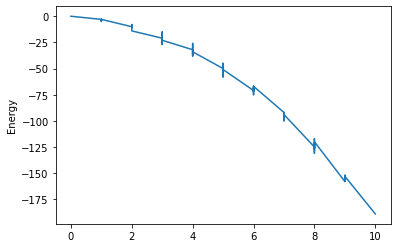

Best found: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
count: 10
Energy: -189.0
Solutions Sampled: 92


In [184]:
min_list, e_min, comb_list=ProbabilisticSampler(-Top_E,10)

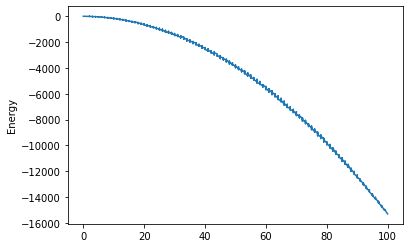

Best found: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
count: 100
Energy: -15304.0
Solutions Sampled: 9902


In [185]:
min_list, e_min, comb_list=ProbabilisticSampler(-E,100)

## Adding Constraints or Penalty

In [260]:
# The constraint matrix
size=dim
max_count=10
strength=90
#strength=1
P=np.ones((size,size))

for i in range(size):
    for j in range(size):
        if i==j:
            P[i,i]=strength*(1-2*max_count)
        else:
            P[i,j]=strength
offset=(max_count)**2

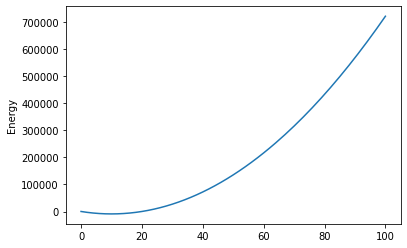

Best found: [0, 39, 43, 45, 53, 60, 71, 73, 75, 96]
count: 10
Energy: -8900.0
Solutions Sampled: 992


In [261]:
min_list, e_min, comb_list=ProbabilisticSampler(P,10,offset)

In [262]:
C=P-E

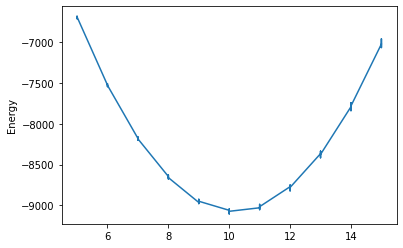

Best found: [2, 16, 25, 43, 44, 51, 65, 69, 77, 87]
count: 10
Energy: -9103.0
Solutions Sampled: 11000


In [295]:
min_list, e_min, comb_list=ProbabilisticSampler(C,1000,offset, 5, 15)

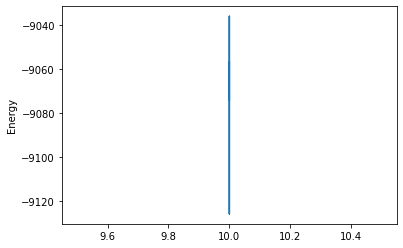

Best found: [16, 18, 19, 34, 36, 56, 65, 69, 84, 92]
count: 10
Energy: -9126.0
Solutions Sampled: 100000


In [263]:
min_list, e_min, comb_list=ProbabilisticSampler(C,100000,offset, 10, 10)

In [189]:
print(comb_list)

[186087894299, 1902231808400, 17310309456440, 141629804643600]


In [300]:
#Top_e_PS=[5, 6, 7, 17, 33, 45, 61, 65, 68, 84]=193
#Top_e_PS=[2, 16, 22, 34, 38, 46, 52, 69, 75, 81, 90]=220
#Top_e_PS=[0, 10, 14, 43, 49, 61, 73, 83, 91, 92]=210
#Top_e_PS=[27, 34, 36, 65, 66, 69, 77, 83, 84, 89]=218
#Top_e_PS=[2, 19, 23, 49, 60, 62, 68, 69, 73, 85]=220
#Top_e_PS=[14, 16, 20, 24, 38, 40, 55, 56, 92, 93]=223
#Top_e_PS=[1, 2, 3, 14, 19, 25, 44, 65, 83, 99] = 212
#Top_e_PS=[2, 16, 25, 43, 44, 51, 65, 69, 77, 87] = 203

Top_e_PS=[16, 18, 19, 34, 36, 56, 65, 69, 84, 92]
# Team score from the original Employee score matrix, using the employee index numbers
team_score=0
for i in (Top_e_PS):
    for j in (Top_e_PS):
        team_score+=E[i,j]
print("Employees", Top_e_PS, "Team Score:",team_score)

Employees [16, 18, 19, 34, 36, 56, 65, 69, 84, 92] Team Score: 226.0


## Running on Simulated Annealer

Check best team again using Simulated Annealer

In [265]:
# Sending All Employee matrix E (using -ve sign for minimization)
Nsampler = neal.SimulatedAnnealingSampler()
QDWaveSA = dimod.BinaryQuadraticModel(C, dimod.BINARY)
SAresponse = Nsampler.sample(QDWaveSA)
for Ssample in SAresponse.data():
    print( Ssample)

Sample(sample={0: 1, 1: 1, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 1, 20: 0, 21: 0, 22: 0, 23: 1, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 1, 46: 0, 47: 1, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 1, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 1, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 1, 96: 0, 97: 0, 98: 0, 99: 0}, energy=-9194.0, num_occurrences=1)


In [266]:
# print qubits with value 1
best=0
team_score=0
for sample, energy, n_occurences in SAresponse.data():
    sample_list=[]
    for i in range(dim):
        #sample_str.append(str(sample['a'+str(a)]))
        if sample[i]==1:
            sample_list.append(i)
    for i in (sample_list):
        for j in (sample_list):
            team_score+=E[i,j]
    if best==0:
        Top_e_DW=sample_list
        best_DWave_val='best Simulated Annealer:'+str(sample_list)+' team_score:'+str(team_score)+' count:'+ str(len(sample_list)) +' occurences:'+str(n_occurences)
        best=1
    print(sample_list, team_score, len(sample_list), n_occurences)
    #break #comment out break to see all values
print(best_DWave_val)   


[0, 1, 4, 19, 23, 45, 47, 59, 78, 95] 194.0 10 1
best Simulated Annealer:[0, 1, 4, 19, 23, 45, 47, 59, 78, 95] team_score:194.0 count:10 occurences:1


## Running on D-Wave

In [ ]:
## Now to see if D-Wave is able to give us a value faster and with lower energy

In [ ]:
# Enter the S3 bucket you created during onboarding in the code below
my_bucket = "amazon-braket-[your bucket]" # the name of the bucket
my_prefix = "[your folder]" # the name of the folder in the bucket
s3_folder = (my_bucket, my_prefix)

In [198]:
from braket.aws import AwsDevice
from braket.ocean_plugin import BraketSampler, BraketDWaveSampler
from dwave.system.composites import EmbeddingComposite

In [200]:
# Please ensure you are using the latest available D-Wave devices on Amazon Braket
# DWave_device='DW_2000Q_6' #if using 2000Q
#DWave_device='Advantage_system6.1' #if using advantage
DWave_device='Advantage_system4.1' #if using advantage

device =AwsDevice.get_devices(names=DWave_device)[0]
sampler = BraketDWaveSampler(s3_folder,device.arn)
sampler = EmbeddingComposite(sampler)
max_shots=device.properties.service.shotsRange[1]
print('Number of qubits: ', device.properties.provider.qubitCount)
print('Number of couplers', len(device.properties.provider.couplers))
print('Shots max {:,}'.format(max_shots) )

Number of qubits:  5760
Number of couplers 37440
Shots max 10,000


In [267]:
#Estimate cost:
variables=100
shots=25*2**variables
if shots>max_shots:
    shots=max_shots
price_per_shot=device.properties.service.deviceCost.price
print('Recommended shots', shots)
print('Estimated cost ${:.2f}'.format(0.3+price_per_shot*shots))

Recommended shots 10000
Estimated cost $2.20


In [268]:
# Notice we already prepared C to have a minimum at 10 employees
linear={i:C[i][i] for i in range(dim)}


In [269]:
# We have to add both sides of the matrix from either side of the diagonal to create the single employee-employee relationship 
quadratic={(i,j):C[i][j]+C[j][i] for i in range(dim) for j in range(dim) if i>j}

In [270]:
vartype = dimod.BINARY
bqm = dimod.BinaryQuadraticModel(linear, quadratic, vartype)

In [271]:
# Note: reduce shots if you want to reduce costs
shots=shots
chain_strength = 1.3
response = sampler.sample(bqm, num_reads=shots, chain_strength=chain_strength)

In [272]:
# print team info
best=0
team_score=0
for sample, energy, n_occurences, chain_break_freq in response.data():
    sample_list=[]
    for i in range(dim):
        #sample_str.append(str(sample['a'+str(a)]))
        if sample[i]==1:
            sample_list.append(i)
    for i in (sample_list):
        for j in (sample_list):
            team_score+=E[i,j]
    if best==0:
        Top_e_DW=sample_list
        best_DWave_val='best D-Wave:'+str(sample_list)+' team_score:'+str(team_score)+' count:'+ str(len(sample_list)) +' occurences:'+str(n_occurences)
        best=1
    print(sample_list, team_score, len(sample_list), n_occurences)
    break #comment out break to see all values
print(best_DWave_val)   


[12, 13, 14, 25, 46, 51, 65, 70, 80, 81] 196.0 10 1
best D-Wave:[12, 13, 14, 25, 46, 51, 65, 70, 80, 81] team_score:196.0 count:10 occurences:1


In [273]:
print('employees:', Top_e_DW)
team_score=0
for i in (Top_e_DW):
    for j in (Top_e_DW):
        team_score+=E[i,j]
print("New Employee Team Score:",team_score)

employees: [12, 13, 14, 25, 46, 51, 65, 70, 80, 81]
New Employee Team Energy: 196.0


In [ ]:
Summary of Results:
    
Traditional method
employees:[2, 12, 14, 16, 23, 28, 59, 65, 85, 92] team_score: 189 count:10
    
Probabilistic Solver
employees: [16, 18, 19, 34, 36, 56, 65, 69, 84, 92] team_score: 226.0 count:10

Simulated Annealer
employees:[0, 1, 4, 19, 23, 45, 47, 59, 78, 95] team_score:194.0 count:10
    
D-Wave Advantage
employees: [12, 13, 14, 25, 46, 51, 65, 70, 80, 81] Team Score: 196.0 count:10